In [2]:
# Decision Tree Regression

# Regression template:-

# Data Preprocessing:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Separating into dependent and independent variables
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

'''# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
'''

'''# Feature Scaling:-
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
'''

'# Feature Scaling:-\nfrom sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nx_train = sc_x.fit_transform(x_train)\nx_test = sc_x.transform(x_test)\n'

In [3]:
# Fitting the Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 0)

# There are different types of criterion to make this regressor
    # 1. mse - mean squared error (default)
    # 2. mae - mean absolute error .. and many others
# As discussed earlier random_state = 0 whenever a function calls for it

regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [4]:
y_pred = regressor.predict([[6.5]])
y_pred

array([150000.])

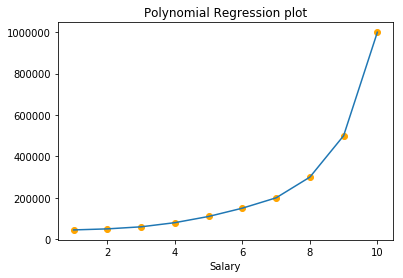

In [5]:
# Visualising the Decisin Tree Regression results
y_pred = regressor.predict(x)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('Polynomial Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# Now this is a trap
# Here we have only 1 independent variable. And what the algo is doing is it takes intervals wherever its getting one
# Like level (0.5-1.5), (1.5-2.5), ... These are the intervals, where x = 0.5, x = 1.5 are the splitting lines respectively
# And it's taking the average value between the 2 splits and passing a straight line through
# This is most likely happening because of the small dataset that we have. In this plot we have a smaller resolution
# Decision tree regression is actually a non continuous linear regression model

# Dont think that the intervals are divided into infinite points. The graph is continuous but the data points are discrete

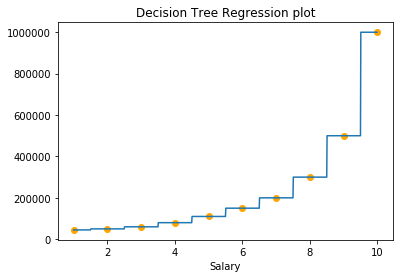

In [6]:
# Visualising the Decision Tree Regression results (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))

y_pred = regressor.predict(x_grid)
plt.scatter(x, y, color = 'orange')
plt.plot(x_grid, y_pred)
plt.title('Decision Tree Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# Here we get a more accurate result because we have technically divided the data points into a higher resolution

In [7]:
# Here we clearly see that this is a non-continuous model
# Its like jump discontinuity between any two consecutive intervals
# With increasing resolution the vertical lines become strictly more vertical

In [8]:
y_pred = regressor.predict([[6.5]])
y_pred

# Shows the same result but with more essence this time

array([150000.])

In [9]:
# Decision tree regression is not a good model to be used in datasets with less features/dimensions
# It is powerful when the number of dimensions/features is high and the number of data points are high
# Though we wont be able to plot it but yeah it'll work good

In [10]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
